In [9]:
import kagglehub as kh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('D:/Project/Normal-Data-Visulization/datasets/Student_Performance/archive/data.csv')

In [11]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


## Eligible to give the exam Whos student has attendence greater than 75%.

In [12]:
df['Eligible'] = np.where(df['Attendance (%)'] > 75, 'Yes', 'No')

## Here now i make the Pie chart of Eligile Students.

In [13]:
df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,Eligible
0,0.95822,3.4,8.2,53.0,47.0,No
1,0.85566,3.2,5.9,55.0,35.0,No
2,0.68025,3.2,9.3,41.0,32.0,No
3,0.25936,3.2,8.2,47.0,34.0,No
4,0.60447,3.8,10.0,75.0,33.0,No
...,...,...,...,...,...,...
1383,0.44549,5.5,8.0,51.0,41.0,No
1384,0.52466,4.9,6.5,63.0,37.0,No
1385,0.88197,3.9,6.2,54.0,36.0,No
1386,0.47336,3.5,7.3,61.0,34.0,No


In [14]:
df['Eligible'].value_counts()

Eligible
No     1277
Yes     111
Name: count, dtype: int64

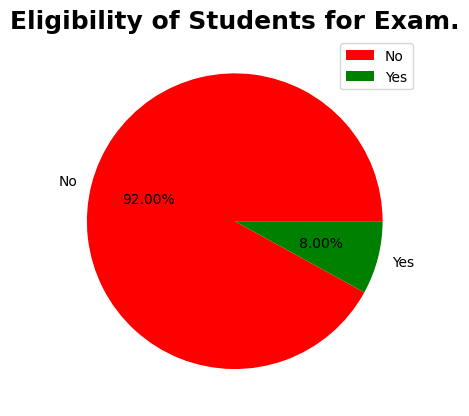

In [19]:
plt.pie(df['Eligible'].value_counts(), labels=['No', 'Yes'], autopct='%.2f%%' ,colors=['r' , 'g'])    #You can set any color

plt.title('Eligibility of Students for Exam.' , fontdict={'fontweight':'bold', 'fontsize': 18})
plt.legend()
plt.show()

## Here we add column Which shows Status of students Pass or Fail.

In [16]:
df['Status'] = np.where(df['Eligible'] == 'Yes' , 'Pass' , 'Fail')
df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,Eligible,Status
0,0.95822,3.4,8.2,53.0,47.0,No,Fail
1,0.85566,3.2,5.9,55.0,35.0,No,Fail
2,0.68025,3.2,9.3,41.0,32.0,No,Fail
3,0.25936,3.2,8.2,47.0,34.0,No,Fail
4,0.60447,3.8,10.0,75.0,33.0,No,Fail
...,...,...,...,...,...,...,...
1383,0.44549,5.5,8.0,51.0,41.0,No,Fail
1384,0.52466,4.9,6.5,63.0,37.0,No,Fail
1385,0.88197,3.9,6.2,54.0,36.0,No,Fail
1386,0.47336,3.5,7.3,61.0,34.0,No,Fail


## Here we can see that Their is student who archive 91 grades because of low attendence Student has Directly Fail.

In [17]:
df[(df['Grades'] > 90) & (df['Grades'] < 100)]

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,Eligible,Status
556,0.99361,9.9,6.6,57.0,91.0,No,Fail


In [47]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades,Eligible,Status
0,0.95822,3.4,8.2,53.0,47.0,No,Fail
1,0.85566,3.2,5.9,55.0,35.0,No,Fail
2,0.68025,3.2,9.3,41.0,32.0,No,Fail
3,0.25936,3.2,8.2,47.0,34.0,No,Fail
4,0.60447,3.8,10.0,75.0,33.0,No,Fail


Now we need the find A student whose attendance greater 75% and Pass and also pass.

In [60]:
condition_1 = df['Attendance (%)'] > 75

Eligible_student = df[condition_1].groupby(['Attendance (%)' , 'Status'])['Grades'].max().reset_index(name='Max Grades')

Eligible_student


,Attendance (%),Status,Max Grades
0,76.0,Pass,61.0
1,77.0,Pass,52.0
2,78.0,Pass,66.0
3,79.0,Pass,58.0
4,80.0,Pass,60.0
5,81.0,Pass,76.0
6,82.0,Pass,50.0
7,83.0,Pass,70.0
8,84.0,Pass,70.0
9,85.0,Pass,68.0
